# SLU16 - Data Sufficiency and Selection
### Exercise notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from utils import plot_learning_curve
import inspect

from hashlib import sha1 # just for grading purposes
import json

def _hash(obj):
    if type(obj) is not str:
        obj = json.dumps(obj)
    return sha1(obj.encode()).hexdigest()

# Context 
As you've learned, it's very important that the data scientist has a good domain knowledge of the field where they are working in, so that they can recognize unexpected effects, and can use their world model to chose features. 

So... to make sure we're all on the same level going into the exercises, we're going to be distinguishing between young and adult Abalones. 

What are Abalones, you ask? These cool things: 
![](https://nnimgt-a.akamaihd.net/transform/v1/crop/frm/Jesinta.Burton/30bc51dc-c571-4944-8dff-a7b5d0c14ff4.jpg/r0_0_728_409_w1200_h678_fmax.jpg)

For reasons which are frankly beyond me, there are people who know a lot about detecting the age of abalones. 

You will do this with machine learning. 

To make matters worse, your instructor is evil, and has added nonsensical random features. 

### Data
The target is `adult`, and is 0 when the abalone is a child, 1 when it's an adult. 

In [2]:
df = pd.read_csv('data/abalone.csv')
df = pd.get_dummies(df)
df.head(2)

,adult,Viscera weight,Coarse-grained Hormones,Diameter,Length,Phosphorylation,Ectopic relationships,Height,Whole weight,Shell weight,Shucked weight,Sex_F,Sex_I,Sex_M
0,1.0,0.1010,0.470,0.365,0.455,0.073,0.989,0.095,0.5140,0.15,0.2245,0,0,1
1,0.0,0.0485,0.697,0.265,0.350,0.655,0.119,0.090,0.2255,0.07,0.0995,0,0,1



# Exercise 1 - find the nonsense 

There are 3 features which are just random. Without using any model, find out which ones they are. 

To determine this use
1. pearson correlation 
2. mutual information (`mutual_info_classif`)

We don't really care about the intermediate steps, but you should probably visualize these in whatever way you like.  

_Hint #1: you can use `display(<something>)` if you want to force jupyter to display a series_  

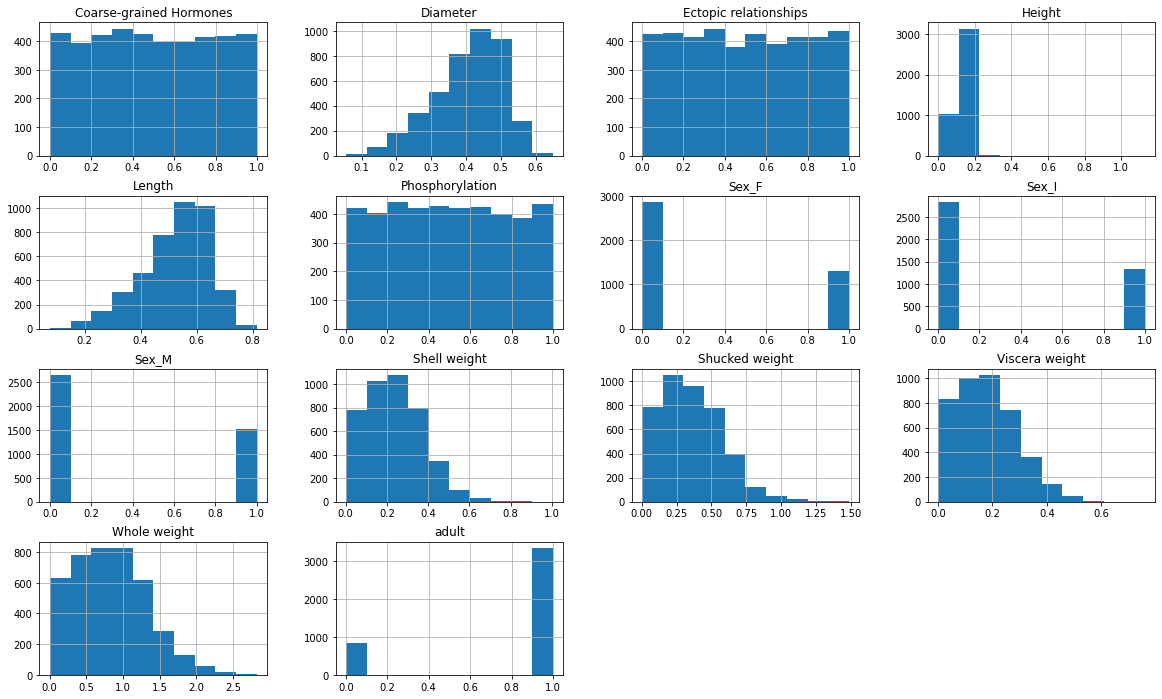

In [3]:
df.hist(figsize=[20,12])
plt.show()

In [4]:
df.corr(method='pearson').abs().mean().sort_values()

Phosphorylation            0.081257
Coarse-grained Hormones    0.086129
Ectopic relationships      0.094102
Sex_M                      0.284228
Sex_F                      0.310509
adult                      0.432755
Sex_I                      0.452729
Height                     0.538721
Shucked weight             0.569135
Shell weight               0.577312
Viscera weight             0.579975
Length                     0.588805
Diameter                   0.591423
Whole weight               0.592308
dtype: float64

In [5]:
pd.Series(data=mutual_info_classif(df, df.adult), index=df.columns).sort_values()

Ectopic relationships      0.000000
Phosphorylation            0.005284
Coarse-grained Hormones    0.006086
Sex_M                      0.012512
Sex_F                      0.038285
Sex_I                      0.101582
Shucked weight             0.202195
Whole weight               0.228436
Viscera weight             0.233766
Length                     0.235066
Height                     0.235351
Diameter                   0.244560
Shell weight               0.258725
adult                      0.502313
dtype: float64

In [6]:
X = df.drop(columns='adult')
y = df.adult

pearson_corr = df.corr(method='pearson').abs().mean().sort_values(ascending=False)
display('Pearson correlation', pearson_corr)

mutual_info = pd.Series(data=mutual_info_classif(df, df.adult), index=df.columns).sort_values(ascending=False)
display('Mutual information', mutual_info)

# (feature names only, the order does not matter)
nonsense_features = ['Phosphorylation', 'Coarse-grained Hormones', 'Ectopic relationships']  

'Pearson correlation'

Whole weight               0.592308
Diameter                   0.591423
Length                     0.588805
Viscera weight             0.579975
Shell weight               0.577312
Shucked weight             0.569135
Height                     0.538721
Sex_I                      0.452729
adult                      0.432755
Sex_F                      0.310509
Sex_M                      0.284228
Ectopic relationships      0.094102
Coarse-grained Hormones    0.086129
Phosphorylation            0.081257
dtype: float64

'Mutual information'

adult                      0.501954
Shell weight               0.254094
Diameter                   0.247281
Length                     0.240572
Viscera weight             0.232831
Height                     0.230660
Whole weight               0.230381
Shucked weight             0.200069
Sex_I                      0.108975
Sex_F                      0.041914
Sex_M                      0.029155
Coarse-grained Hormones    0.002604
Phosphorylation            0.001290
Ectopic relationships      0.000000
dtype: float64

In [7]:
### BEGIN TESTS
assert _hash(sorted(nonsense_features)) == '1f2779dbe1c037234cba7a7f7f303bee81757cc1'
print('Great success!')
### END TESTS

Great success!


# Exercise 2 - observe the tree 

Yay! Time to look at trees. 

To pass this exercise, you will make a function called `train_and_plot_tree` that will do the following: 

1. Fit a tree with `max_depth` of 3, and `min_samples_split` of 20 
2. Plot that tree, in a way that clearly shows the feature names, and the percentage of adults in each node. 
3. Return the plot (just assign the output of a function to a variable and return it for evaluation) 

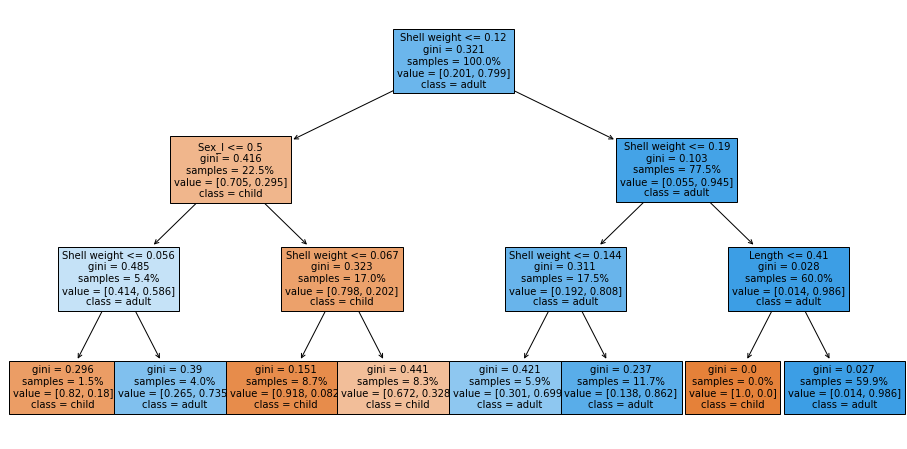

In [8]:
plt.figure(figsize=[16,8])

def train_and_plot_tree(X, y): 
    
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=20).fit(X, y)
    
    my_plot = plot_tree(tree,
                        feature_names=X.columns,
                        class_names=['child', 'adult'],
                        label='all',
                        filled=True,
                        #impurity=True,      
                        proportion=True,
                        #rounded=True,       
                        fontsize=10,
                       )
    
    return my_plot 

tree_plot = train_and_plot_tree(X, y);
tree_plot;

In [9]:
sig = inspect.signature(train_and_plot_tree)
assert set(sig.parameters.keys()) == {'X', 'y'}, 'Do not change the signature!'  
all_text = ''.join([tree_plot[i].get_text() for i in range(len(tree_plot))])
assert 'Shell weight' in all_text, 'Your feature names seem weird'
assert 'child' in all_text, 'Did you make the right labels for class names?'
first_node_feature = tree_plot[0].get_text().split('<')[0].strip()
assert _hash(first_node_feature) == 'a0a91ccd0f0074dd419b7750263b9fbe107e7c86', 'Unexpected first node'
assert len(tree_plot) == 15, 'The tree seems to have the wrong size'
node_12 = tree_plot[12].get_text()
assert 'gini = 0.028' in node_12, 'Are you sure you configured the tree correctly?'
assert 'adult' in node_12, 'We want you to have the target labels in the plot'
assert '0.986' in node_12, 'Do you have the proportions in the nodes?'
print('Great success!')

Great success!


# Exercise 3: model based feature importances (linear) 
You will fit a logistic regression to get the features that produce the top 5 coefficients. 
Note that the coefficients can be both positive and negative, and you care about "the biggest magnitude". 

We will take care of the normalization for you. _(if you ever train a logistic regression without normalizing the features I will place gummybears in your lasagna. Consider yourself warned.)_

In [10]:
rs = RobustScaler()  # just scaling, because I'm nice. 
X_normed = pd.DataFrame(rs.fit_transform(X), 
                        columns=X.columns)  # remember this? cool huh! 


# As before, we just want the names of the features, in a list. 
# From now it's up to you. Use default parameters on the logistic regression. 
# something (~ 5 rows)

lr = LogisticRegression().fit(X_normed, y)
coefficients = pd.Series(data=lr.coef_.squeeze(), index=X_normed.columns).abs().sort_values(ascending=False)
display('Coefficients', coefficients)

top_5_by_magnitude_linear = coefficients.index[:5]

print(sorted(top_5_by_magnitude_linear))

'Coefficients'

Shell weight               3.553867
Shucked weight             2.891499
Diameter                   1.187838
Height                     0.830160
Sex_I                      0.638095
Length                     0.600337
Whole weight               0.513392
Sex_M                      0.375813
Sex_F                      0.263460
Ectopic relationships      0.091077
Viscera weight             0.048395
Phosphorylation            0.017353
Coarse-grained Hormones    0.002870
dtype: float64

['Diameter', 'Height', 'Sex_I', 'Shell weight', 'Shucked weight']


In [11]:
assert len(top_5_by_magnitude_linear) == 5 
assert _hash(sorted(top_5_by_magnitude_linear)) == 'f814d06f92beab782a3d1e0d0d9fe3098520c2b2'
print('Great success!')

Great success!


# Exercise 4: model based feature importances (non-linear) 
Oh, you made it! Good. Now for non-linear. 

Train a Random Forest, with the following parameters: 
* n_estimators = 50 
* max_depth = 2
* min_samples_split = 50 
* random_state = 1000
* n_jobs = -1  (optional, but speeds things up)

Then use it to get feature importances. Use the non-normalized features. 

As before, get the top 5 features by importance.

In [12]:
rf = RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_split=50, random_state=1000, n_jobs=-1).fit(X, y)

importances = pd.Series(data=rf.feature_importances_.squeeze(), index=X_normed.columns).abs().sort_values(ascending=False)
display('Feature importances', importances)

top_5_by_importance_random_forest = importances.index[:5]

print(sorted(top_5_by_importance_random_forest))

'Feature importances'

Shell weight               0.296057
Diameter                   0.170562
Height                     0.138645
Whole weight               0.132485
Viscera weight             0.103978
Length                     0.056688
Shucked weight             0.056422
Sex_I                      0.040629
Sex_F                      0.003543
Sex_M                      0.000860
Coarse-grained Hormones    0.000131
Ectopic relationships      0.000000
Phosphorylation            0.000000
dtype: float64

['Diameter', 'Height', 'Shell weight', 'Viscera weight', 'Whole weight']


In [13]:
assert len(top_5_by_importance_random_forest) == 5
assert _hash(sorted(top_5_by_importance_random_forest)) == 'bbc12adaef06b61e02cb766182fab945577633b4'
print('Great success!')

Great success!


# Exercise 5: 

Do we have enough data, or should we go collect more abalones? Let's find out with learning curves! 

Using the random forest you already initialized, do the following: 

1. Define a numpy array of train_sizes, from 10% of the data to 100%, in increments of 10% (0.1, 0.2, 0.3... etc) 


2. Get the learning curve data, with the following configuration:
    - classifier: your old random forest from exercise 4 
    - metric: use area under the roc curve as your metric 
    - use the train sizes array you just created
    - all features, not normalized 
    - cv = 5 
    - random state = 1000 (needed to pass the grader) 
    - n_jobs = -1 (optional, but faster) 

As with the learning notebooks you should save the output to `train_sizes_abs`, `train_scores` and `test_scores` 

3. Plot it! _(feel free to use plot_learning_curve that we used in the learning notebook, but remember that's custom code)_ 


In [14]:
(np.arange(.1, 1.1, .1)*len(y)).round(0)

array([ 418.,  835., 1253., 1671., 2088., 2506., 2924., 3342., 3759.,
       4177.])

In [15]:
train_sizes = np.arange(.1, 1.1, .1)   #(10% increments, starting at 10%)

lc = learning_curve(estimator=rf,
                    scoring='roc_auc',
                    train_sizes=train_sizes,
                    X=X,
                    y=y,
                    cv=5,
                    random_state=1000,
                    n_jobs=-1)
train_sizes_abs, train_scores, test_scores = lc

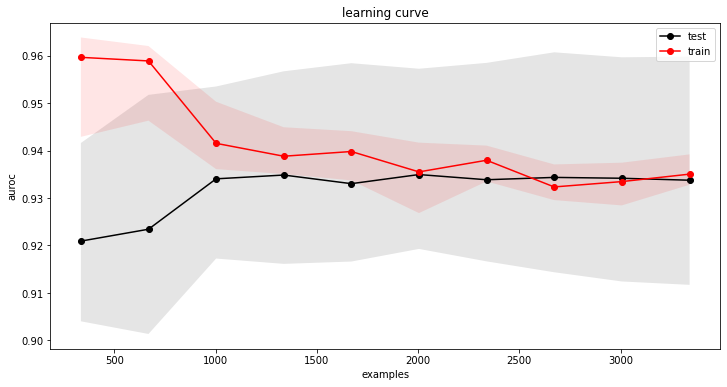

In [16]:
plt.figure(figsize=[12,6])

plt.plot(train_sizes_abs, test_scores.mean(axis=1), marker='o', color='k', label='test')
plt.fill_between(train_sizes_abs, test_scores.min(axis=1), test_scores.max(axis=1), facecolor='k', alpha=0.1)

plt.plot(train_sizes_abs, train_scores.mean(axis=1), marker='o', color='r', label='train')
plt.fill_between(train_sizes_abs, train_scores.min(axis=1), train_scores.max(axis=1), facecolor='r', alpha=0.1)

plt.legend()
plt.xlabel('examples')
plt.ylabel('auroc')
plt.title('learning curve')

plt.show()

In [17]:
e1 = 'your train scores dont look right. Did you use the right features? Maybe check for categoricals, that can cause issues'
assert np.nan not in train_scores, e1 
assert train_sizes.sum() == 5.5, 'Are your train sizes correct?'
assert train_sizes.mean() == .55, 'Are your train sizes correct?'
assert len(train_sizes) == 10, 'Are your train sizes correct?'
assert train_sizes_abs.mean() == 1837.1, 'Are your train sizes abs correct?'
assert round(pd.DataFrame(train_scores).mean().median(), 2) == 0.94, 'Are your train scores correct?'
assert round(pd.DataFrame(test_scores).median().quantile(.3), 2) == 0.93, 'Are your test scores correct?'
print('Great success!')

Great success!
